<a href="https://colab.research.google.com/github/GitHubrenu/ProgrammingAssignment2-1/blob/master/Stud_Feature_Selction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FEATURE SELECTION

CORRELATION MATRIX

In [17]:
 
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import io

In [3]:
#upload csv files
from google.colab import files
data_to_load = files.upload()

Saving student-mat.csv to student-mat.csv


In [4]:
 train_mat= pd.read_csv(io.BytesIO(data_to_load['student-mat.csv']))

In [5]:
#upload csv files
from google.colab import files
data_to_load = files.upload()

Saving student-por.csv to student-por.csv


In [6]:
train_por= pd.read_csv(io.BytesIO(data_to_load['student-por.csv']))

In [7]:
 train_por.dropna().shape #no null values in train_por

(649, 33)

In [8]:
train_mat.dropna().shape #no null values in train_mat

(395, 33)

In [9]:
train_por=train_por.drop_duplicates(subset=None, keep='first', inplace=False)
train_por.shape

(649, 33)

In [10]:
 train_mat=train_mat.drop_duplicates(subset=None, keep='first', inplace=False)
train_mat.shape

(395, 33)

In [11]:
train_por['subject']='Portuguese'
train_mat['subject']='Maths'

In [12]:
train=pd.concat([train_por, train_mat], axis=0)

In [13]:
train.to_csv('students.csv', index=False)

In [14]:
# contains all the merged data
data = pd.read_csv('students.csv')

Text(0.5, 1.0, 'Correlation Heatmap')

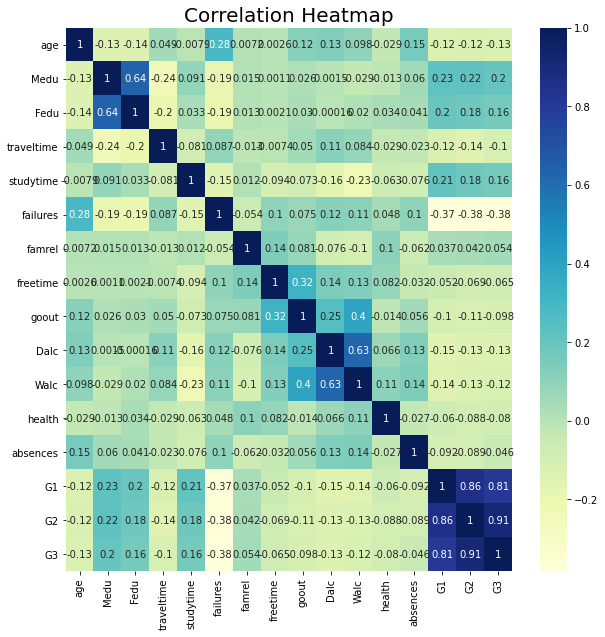

In [18]:
 
# see correlation between variables through a correlation heatmap
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap', fontsize=20)

In [19]:
 #convert finalscore to categorical variable
data = pd.read_csv('students.csv')
data.head()
data['Understanding'] = 'na'
data.loc[(data.G3 >= 18) & (data.G3 <= 20), 'Understanding'] = 'Excellent'
data.loc[(data.G3 >= 15) & (data.G3 <= 17), 'Understanding'] = 'Good' 
data.loc[(data.G3 >= 11) & (data.G3 <= 14), 'Understanding'] = 'Satisfactory' 
data.loc[(data.G3 >= 6) & (data.G3 <= 10), 'Understanding'] = 'Poor'
data.loc[(data.G3 >= 0) & (data.G3 <= 5), 'Understanding'] = 'Failure' 
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,Understanding
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,Portuguese,Satisfactory
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,Portuguese,Satisfactory
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,Portuguese,Satisfactory
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,Portuguese,Satisfactory
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,Portuguese,Satisfactory


In [21]:
#absences - number of school absences (numeric: from 0 to 93) 
data.head()
data['Regularity'] = 'na'
data.loc[(data.absences >= 0) & (data.absences <= 9), 'Regularity'] = 'Always Regular'
data.loc[(data.absences >= 10) & (data.absences <= 29), 'Regularity'] = 'Mostly Regular' 
data.loc[(data.absences >= 30) & (data.absences <= 49), 'Regularity'] = 'Regular' 
data.loc[(data.absences >= 50) & (data.absences <= 79), 'Regularity'] = 'Irregular' 
data.loc[(data.absences >= 80)& (data.absences <= 93), 'Regularity'] = 'Highly Irregular'
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,Understanding,Regularity
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,Portuguese,Satisfactory,Always Regular
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,Portuguese,Satisfactory,Always Regular
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,Portuguese,Satisfactory,Always Regular
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,Portuguese,Satisfactory,Always Regular
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,Portuguese,Satisfactory,Always Regular


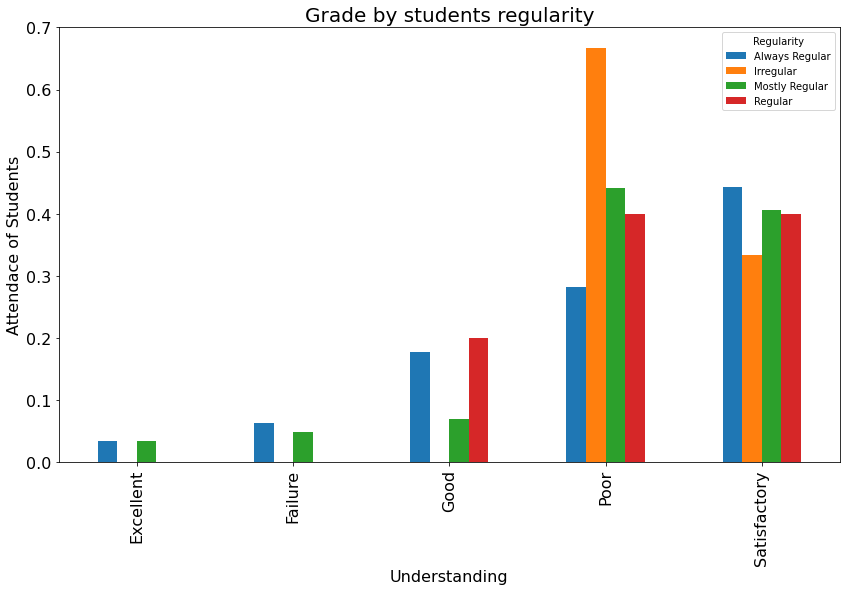

<Figure size 432x288 with 0 Axes>

In [24]:
 perc = (lambda col: col/col.sum())
index = ['Failure','Poor','Satisfactory','Good','Excellent']
absences = pd.crosstab(index=data.Understanding, columns=data.Regularity)
absences = perc(absences)
absences.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade by students regularity', fontsize=20)
plt.ylabel('Attendace of Students', fontsize=16)
plt.xlabel('Understanding', fontsize=16)
plt.show()
plt.savefig('Grade_regularity.png', bbox_inches='tight')